# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.

 - Load each XLS or XLSX file in your Jupyter notebook. For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
2. Plot the distribution of data points using a histogram
3. Create a lag plot (a lag plot shows t versus t+1)
4. Based on the lag plot, state in a markdown cell whether the order of this data matters.
5. Do one of the following (not both):

   A. If the order of the data matters, then interpolate the missing values
   
   B. If the order of the data does not matter, fill in the missing data by sampling from the distribution
   
   C. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
   
   D. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATAFRAME 1

In [4]:
df1 = pd.read_excel('imputation_homework_12.xlsx')

In [5]:
display(df1)

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [6]:
#Total number of missing values in df1
df1.isna().sum()

Unnamed: 0    0
x             9
y             0
dtype: int64

In [7]:
# plt.figure(figsize = (20, 10))
# ticks = [10, 20, 30, 40]
# plt.bar(x = df1['xdd'], height = df1['y'])
# plt.yticks(ticks)

Text(0, 0.5, 'y')

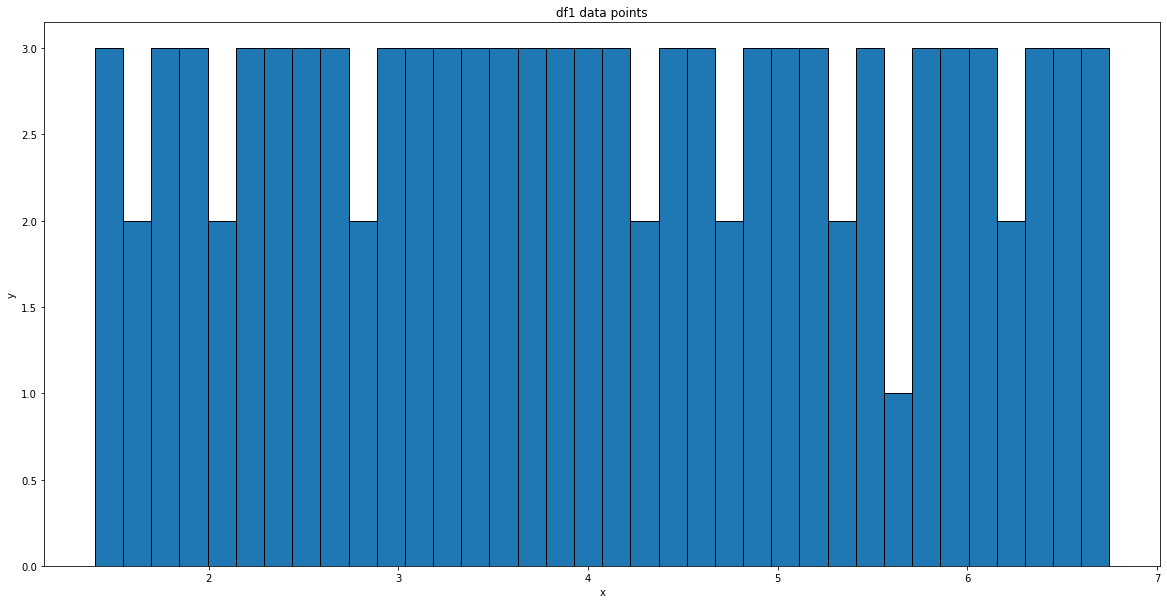

In [8]:
plt.figure(figsize = (20, 10))
plt.hist(df1['x'], bins = int((180)/5), edgecolor = 'black')
plt.title('df1 data points')
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

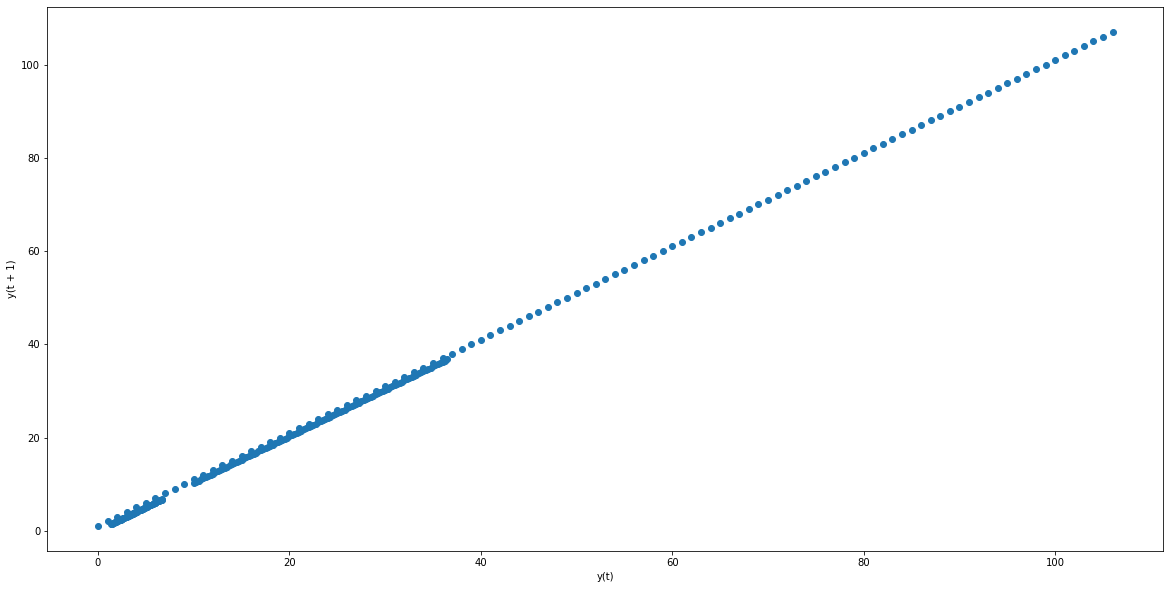

In [9]:
#Lag plot for df1
plt.figure(figsize = (20, 10))
pd.plotting.lag_plot(df1, lag = 1)

Data here is correlated with themselves and is not a random. In this case we can interpolate.

In [10]:

import scipy 
import scipy.interpolate


In [18]:
df1 = df1.interpolate(method = 'linear', order = 1, limit_direction = 'forward')

In [19]:
df1['x'].interpolate(method = 'linear', limit_direction = 'forward')

0      1.40
1      1.45
2      1.50
3      1.55
4      1.60
       ... 
103    6.55
104    6.60
105    6.65
106    6.70
107    6.75
Name: x, Length: 108, dtype: float64

In [20]:
df1['x'].isna().sum()

0

Text(0, 0.5, 'y')

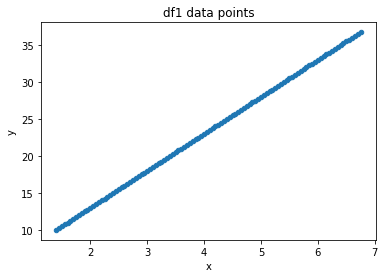

In [21]:
df1.plot.scatter(x = 'x', y = 'y')
plt.title('df1 data points')
plt.xlabel('x')
plt.ylabel('y')

DATAFRAME 2 

In [22]:
df2 = pd.read_excel('imputation_homework_32.xls')
df2

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [23]:
df2.isna().sum()

Unnamed: 0     0
time           0
value         48
dtype: int64

Text(0, 0.5, 'value')

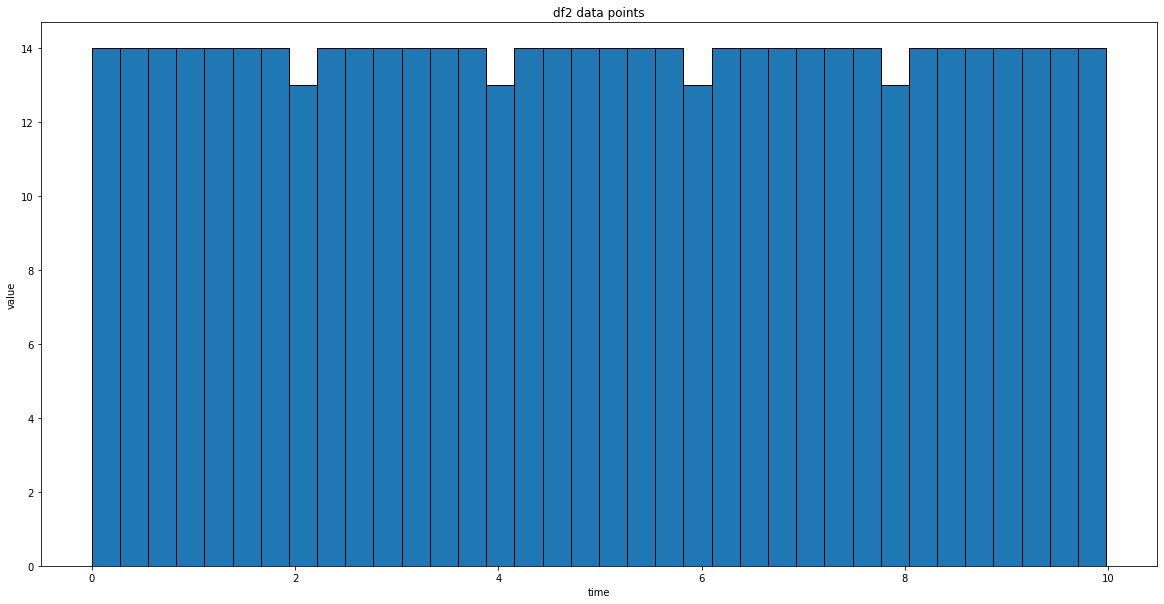

In [24]:
plt.figure(figsize = (20, 10))
plt.hist(df2['time'], bins = int(180/5), edgecolor = 'black')
plt.title('df2 data points')
plt.xlabel('time')
plt.ylabel('value')


Text(0, 0.5, 'value')

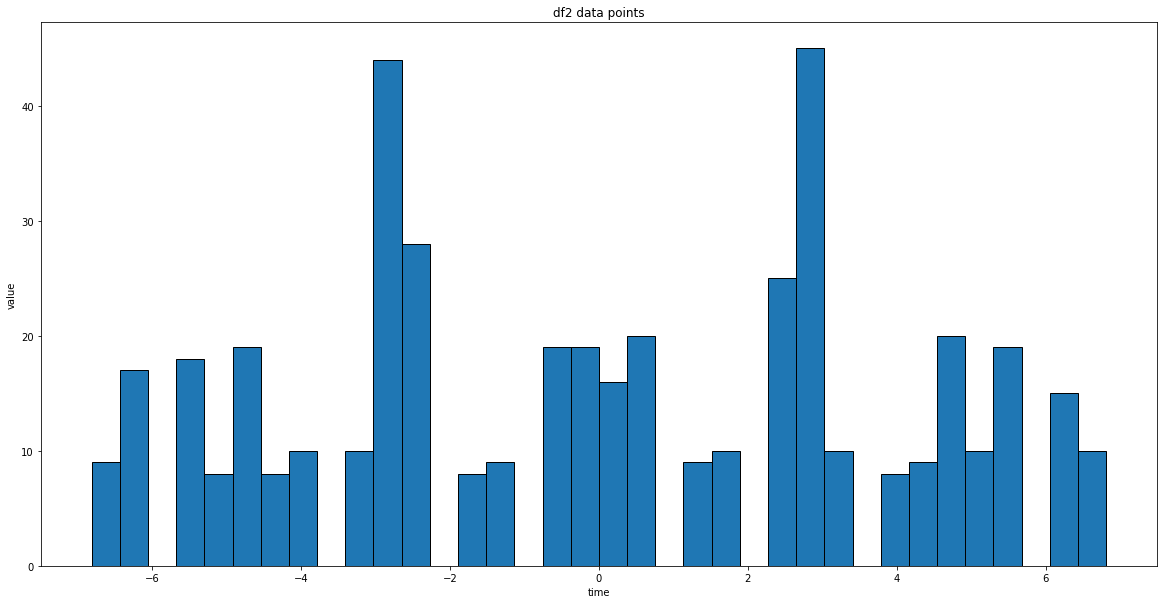

In [25]:
plt.figure(figsize = (20, 10))
plt.hist(df2['value'], bins = int(180/5), edgecolor = 'black')
plt.title('df2 data points')
plt.xlabel('time')
plt.ylabel('value')

Text(0.5, 0, 'value')

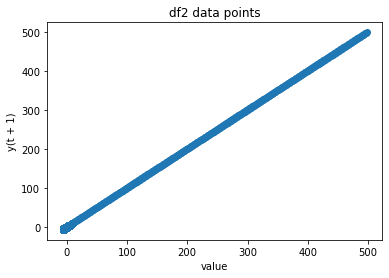

In [26]:
#Lag Plot

pd.plotting.lag_plot(df2, lag = 1)
plt.title('df2 data points')
plt.xlabel('time')
plt.xlabel('value')

Here, the order of the data is not random and has to be interpolated.

In [27]:
#interpolation
df2 = df2.interpolate(method = 'linear', order = 1, limit_direction = 'forward')

In [28]:
df2['value'].isna().sum()

0

Text(0, 0.5, 'value')

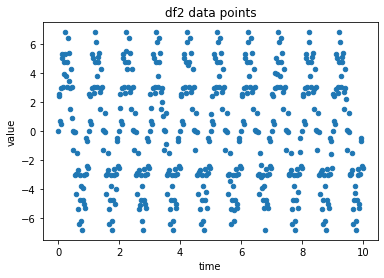

In [30]:
df2.plot.scatter(x = 'time', y = 'value')
plt.title('df2 data points')
plt.xlabel('time')
plt.ylabel('value')

DATAFRAME 3

In [31]:
df3 = pd.read_excel('imputation_homework_78.xlsx')
df3

,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955
...,...,...,...
847,847,2018-02-27,14.469096
848,848,2018-02-28,30.466798
849,849,2018-03-01,13.722157
850,850,2018-03-02,16.117787


In [32]:
df3.isna().sum()

Unnamed: 0     0
date           0
value         81
dtype: int64

/Users/poojaanil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'value')

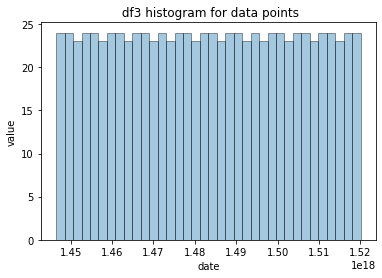

In [33]:
sns.distplot(df3['date'], hist = True, kde= False, bins = int(180/5), hist_kws = {'edgecolor':'black'})
plt.title(' df3 histogram for data points')
plt.xlabel('date')
plt.ylabel('value')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

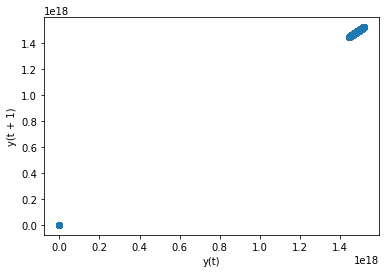

In [34]:
df3['date'] = pd.to_numeric(pd.to_datetime(df3['date']))
pd.plotting.lag_plot(df3, lag=1)

As the lag plot is not linear, which means that the values are random and here sampling can be done.

In [35]:
mean = df3['value'].mean()
df3['value'].fillna(mean, inplace=True)

In [36]:
df3.value

0      13.394304
1      -3.800715
2      28.098152
3      20.500562
4      33.981955
         ...    
847    14.469096
848    30.466798
849    13.722157
850    16.117787
851    -8.030111
Name: value, Length: 852, dtype: float64

In [37]:
df3.isna().sum()

Unnamed: 0    0
date          0
value         0
dtype: int64

Text(0, 0.5, 'value')

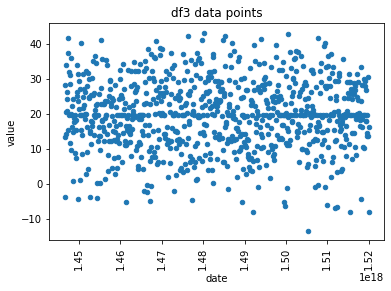

In [38]:
df3.plot.scatter(x = 'date', y = 'value', rot = 90)
plt.title('df3 data points')
plt.xlabel('date')
plt.ylabel('value')